# 1. Organizing Images

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/LOTLOUISCHO/Desktop/02MyProjects/ktx_project')
import glob
from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")

In [2]:
#0 means KTX-1
#1 means KTX-EUM
#2 means KTX-Sancheon
#3 means SRT
hsr0 = []
hsr1 = []
hsr2 = []
hsr3 = []

In [3]:
for classes in os.listdir('trains'):
    route = 'trains/'+classes+'/'
    for path in os.listdir(route):
        if classes == 'ktx_1':
            hsr0.append(route+path)
        elif classes == 'ktx_eum':
            hsr1.append(route+path)
        elif classes == 'ktx_sancheon':
            hsr2.append(route+path)
        elif classes == 'srt':
            hsr3.append(route+path)

In [4]:
print('KTX-1:',len(hsr0))
print('KTX-EUM:',len(hsr2))
print('KTX-Sancheon:',len(hsr1))
print('SRT:',len(hsr3))

KTX-1: 10
KTX-EUM: 10
KTX-Sancheon: 10
SRT: 10


# 2. Exploratory Data Analysis

In [5]:
def explore(hsr,hsr_type):
    fig,axes = plt.subplots(figsize=(30,35))
    random_image = [choice(hsr)for x in range(0,11)] #print 10 images randomly

    for i in range(0,len(random_image)):
        img = imread(random_image[i])
        plt.imshow(img)
        axes =plt.subplot(5,5,i+1)
        axes.set_title(hsr_type + ' ' +str(i+1),fontsize=20) 

    fig.delaxes(axes)
    fig.suptitle(hsr_type,fontsize=35)
    fig.suptitle

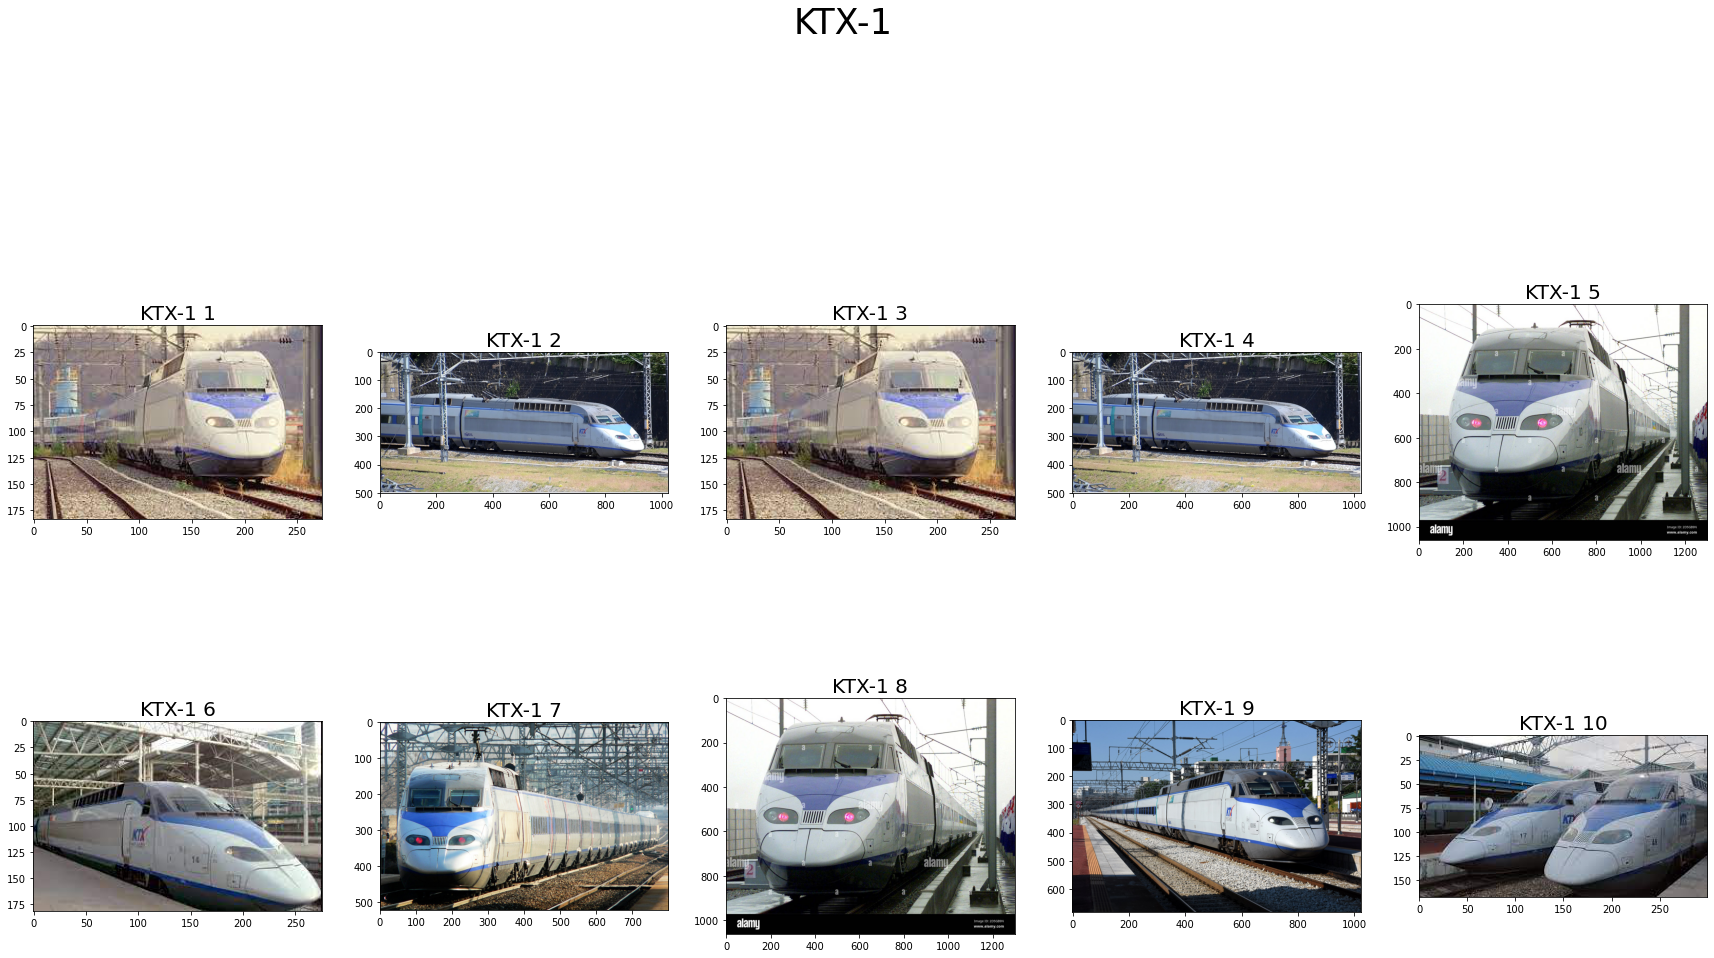

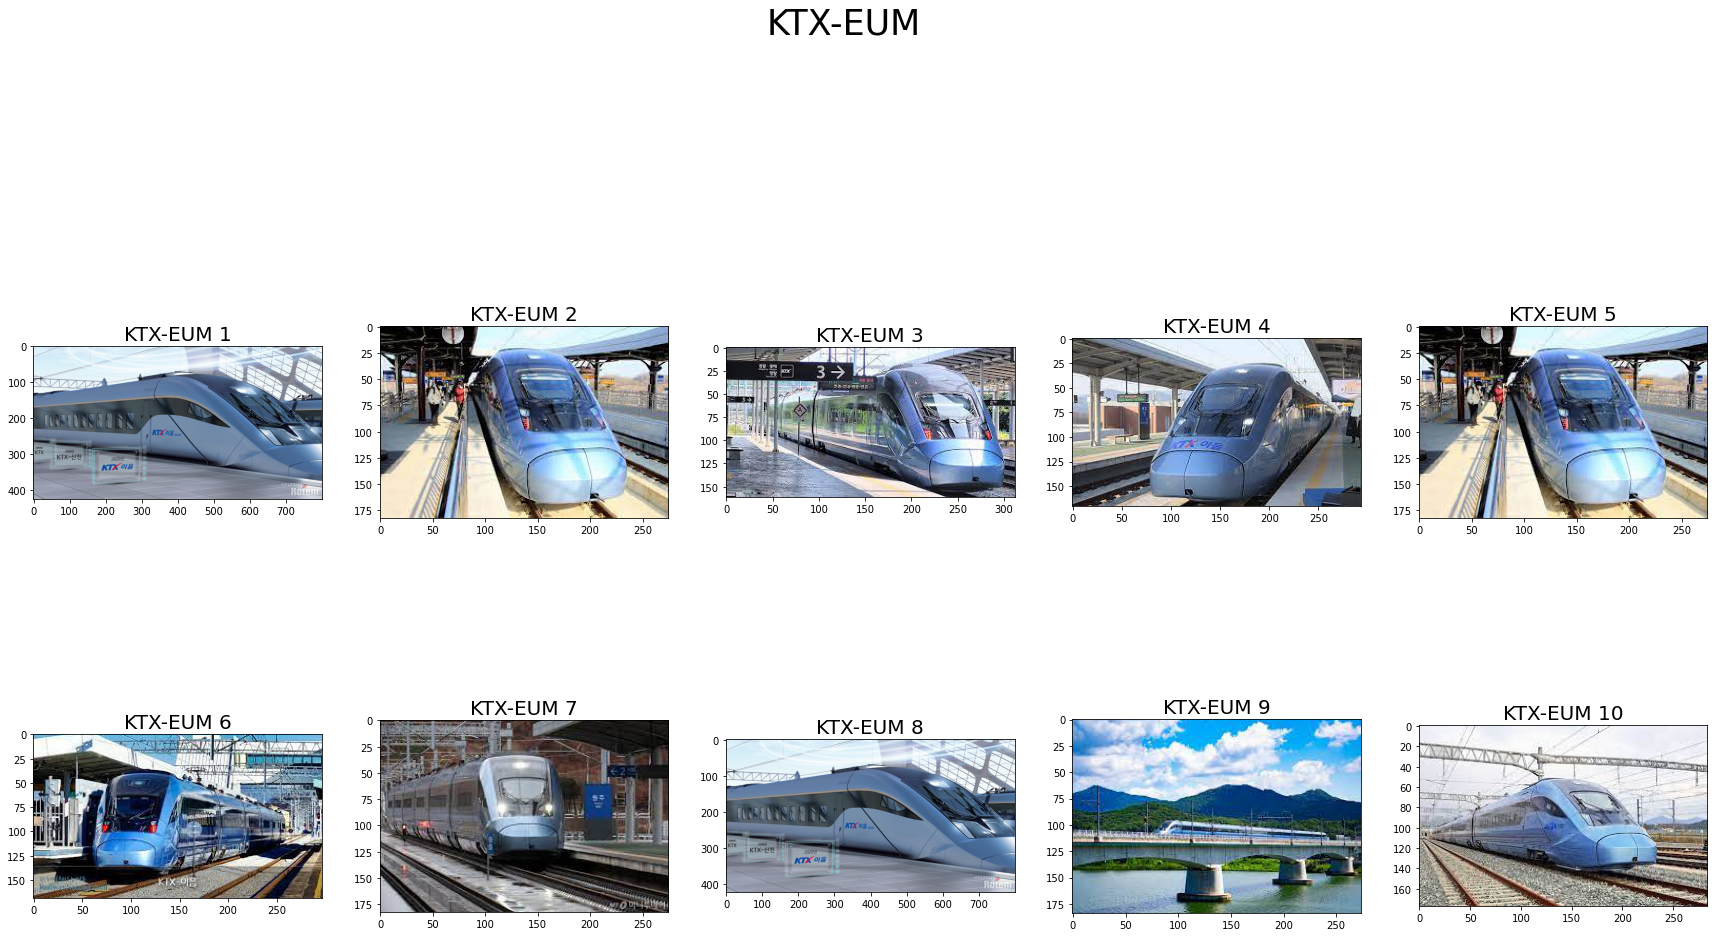

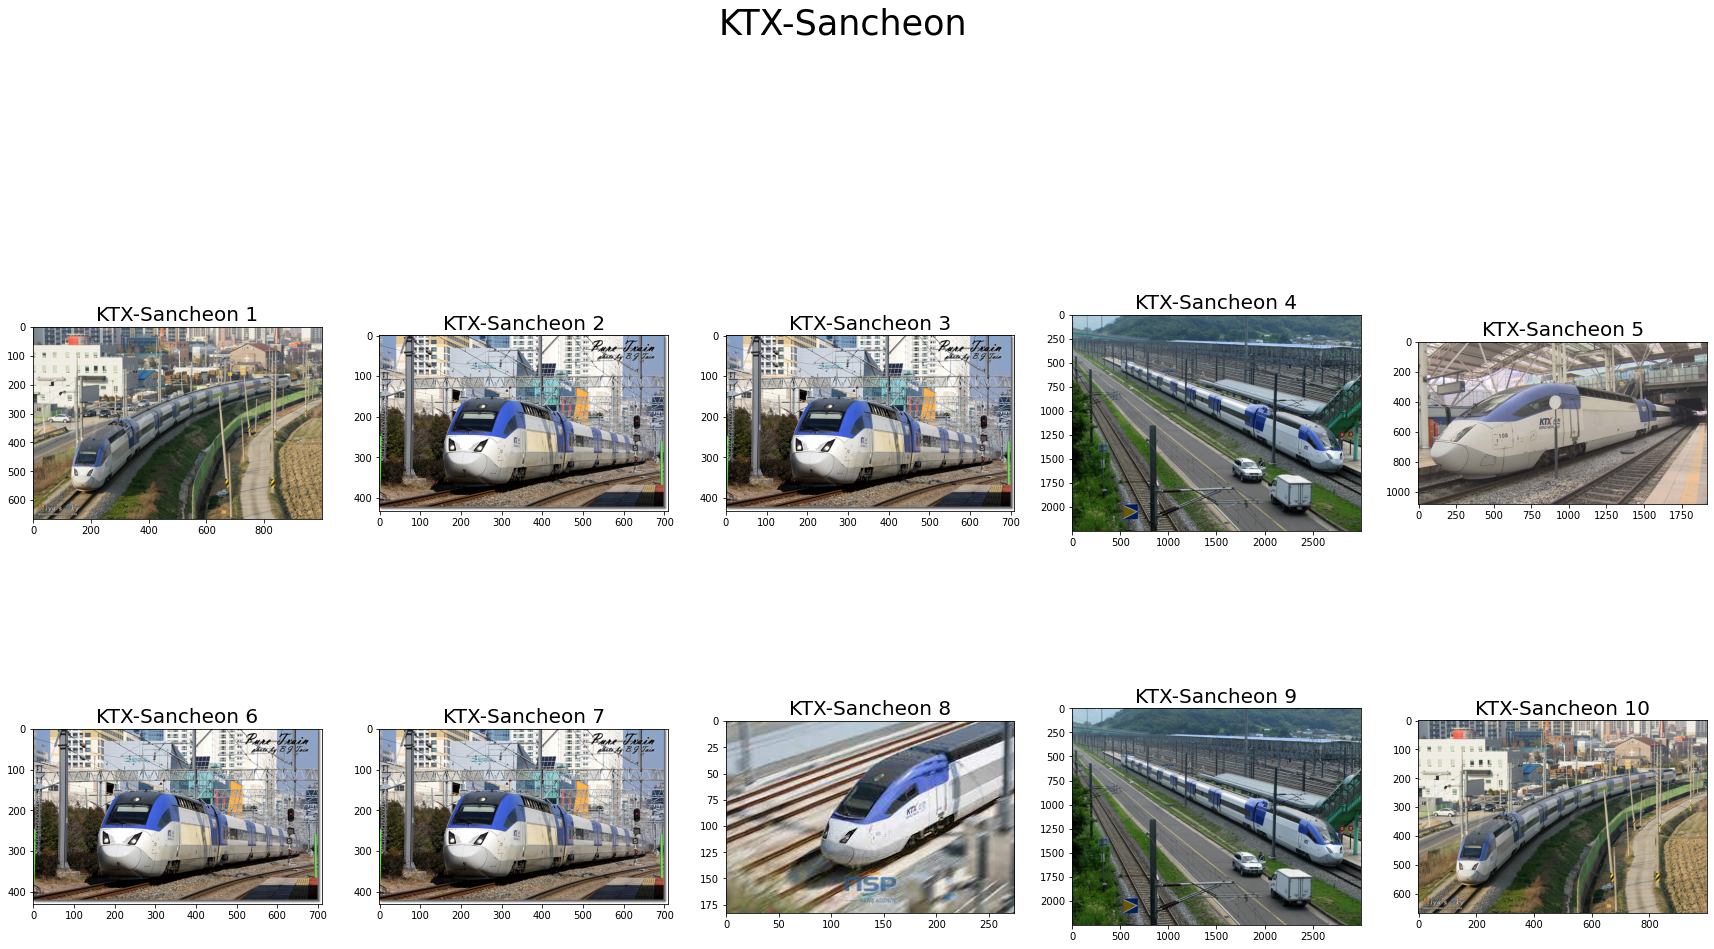

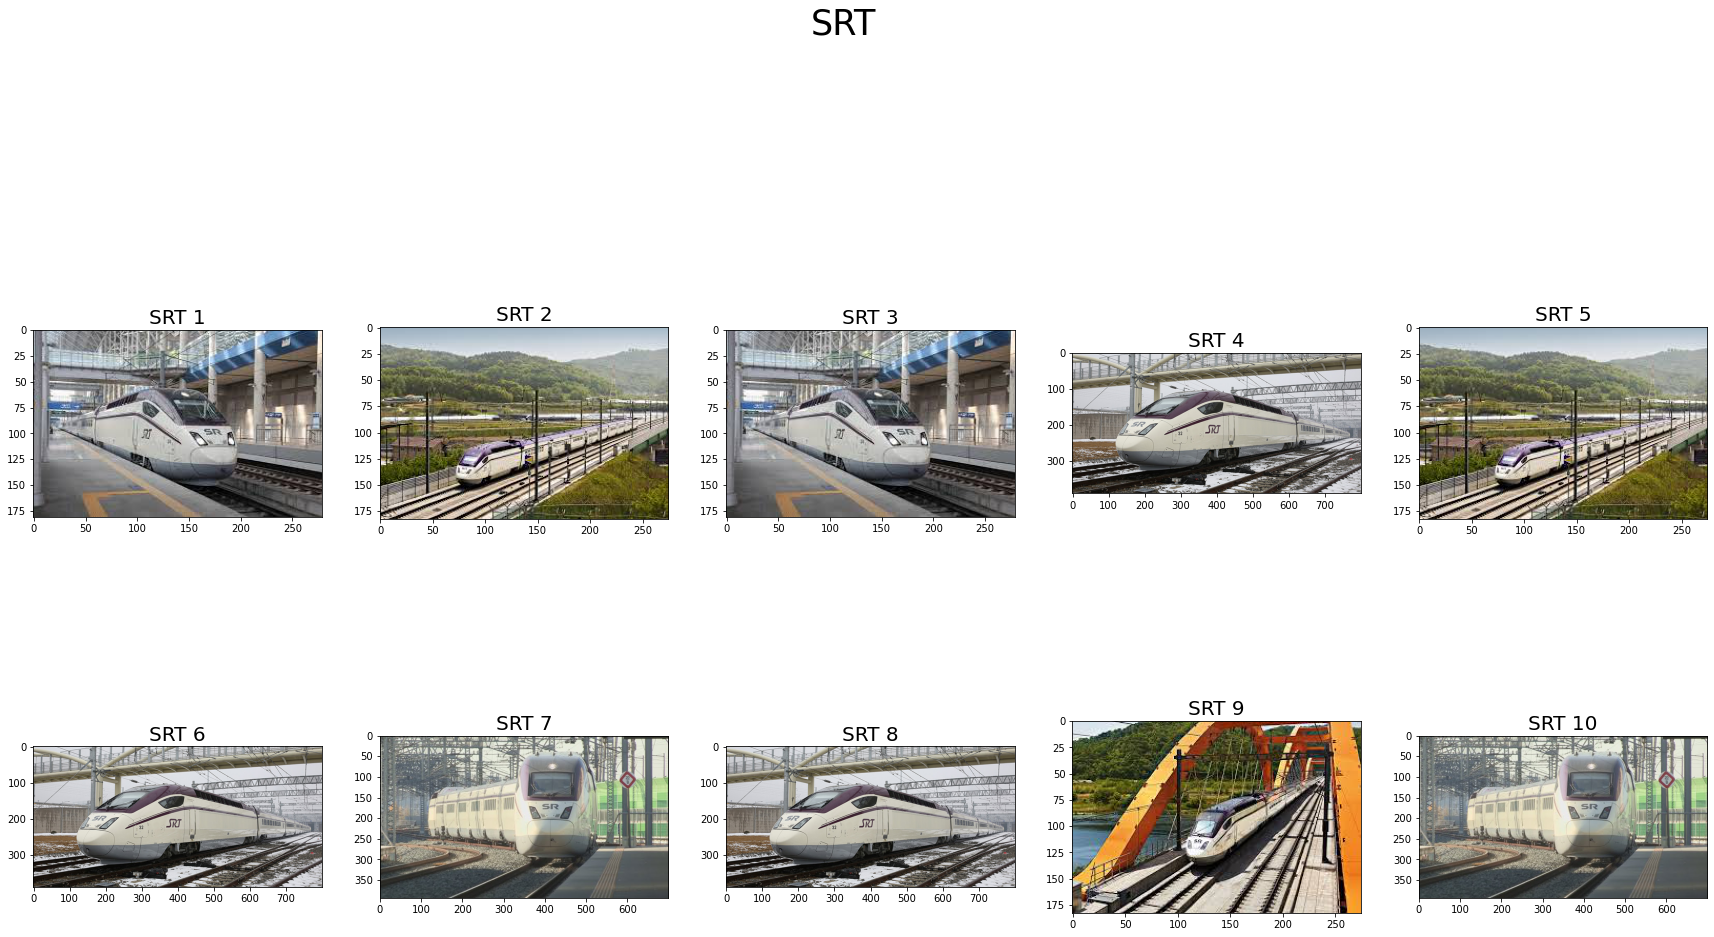

In [6]:
#display grid of images
train_types = ['KTX-1','KTX-EUM','KTX-Sancheon','SRT']
hsr = [hsr0,hsr1,hsr2,hsr3]
count = 0
for h in hsr:
    explore(h,train_types[count])
    count +=1

# 3. Create Training and Testing Image Datasets

In [7]:
batch_size = 32 #batch size is a number of samples processed before the model is updated
img_height = 180 #height of our image
img_width = 180 #width of our image
epochs = 50 #number of steps

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "trains",
    seed=123,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 40 files belonging to 4 classes.


In [9]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'trains',
    validation_split=0.2, #training and testing images are split around 80-20%
    subset="training", #we are going to 'train' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width), #adjust the image size
    batch_size=batch_size) #given batch size

Found 40 files belonging to 4 classes.
Using 32 files for training.


In [10]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  'trains',
    validation_split=0.2,
    subset="validation", #we are going to 'test' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 40 files belonging to 4 classes.
Using 8 files for validation.


In [11]:
AUTOTUNE = tf.data.AUTOTUNE
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# 4. CNN Model Creation

In [12]:
n_classes = 4

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model_history = model.fit(
  training_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.3852 - accuracy: 0.2500 - val_loss: 1.4110 - val_accuracy: 0.1250
Epoch 2/50
1/1 [==============================] - 1s 906ms/step - loss: 1.3739 - accuracy: 0.2812 - val_loss: 1.4418 - val_accuracy: 0.1250
Epoch 3/50
1/1 [==============================] - 1s 903ms/step - loss: 1.3604 - accuracy: 0.2812 - val_loss: 1.4532 - val_accuracy: 0.1250
Epoch 4/50
1/1 [==============================] - 1s 920ms/step - loss: 1.3429 - accuracy: 0.2812 - val_loss: 1.4061 - val_accuracy: 0.1250
Epoch 5/50
1/1 [==============================] - 1s 874ms/step - loss: 1.3127 - accuracy: 0.2812 - val_loss: 1.3807 - val_accuracy: 0.1250
Epoch 6/50
1/1 [==============================] - 1s 949ms/step - loss: 1.2713 - accuracy: 0.5625 - val_loss: 1.3248 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 978ms/step - loss: 1.2156 - accuracy: 0.7188 - val_loss: 1.2520 - val_accuracy: 0.3750
Epoch 8/50
1/1 [=======

In [15]:
training_acc = model_history.history['accuracy'] #training accuracy
testing_acc = model_history.history['val_accuracy'] #test accuracy

training_loss = model_history.history['loss'] #training loss
testing_loss = model_history.history['val_loss'] #test loss

<Figure size 432x288 with 0 Axes>

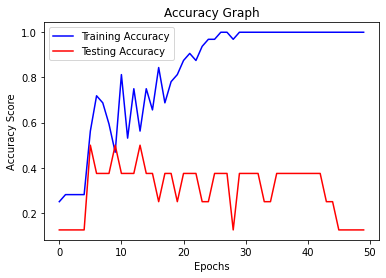

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(range(epochs),training_acc,'b',label='Training Accuracy')
plt.plot(range(epochs), testing_acc, 'r', label='Testing Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

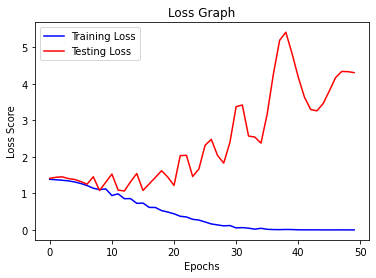

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(range(epochs),training_loss,'b',label='Training Loss')
plt.plot(range(epochs), testing_loss, 'r', label='Testing Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.legend()
plt.figure()

# Predicting with Given Images

In [18]:
class_names = ['KTX-1','KTX-EUM','KTX-Sancheon','SRT']

In [19]:
image = tensorflow.keras.preprocessing.image.load_img('predictions/ktx_one_0_pred.png', target_size=(img_height, img_width)) #loading image from outside training dataset
images = tensorflow.keras.preprocessing.image.img_to_array(image) #preprocessing image
images = tf.expand_dims(images, 0) 

predictions = model.predict(images) #predicting image with neural network model trained previously
score = tf.nn.softmax(predictions[0])
predictions

1/1 [==============================] - 0s 168ms/step


array([[9.9993098e-01, 7.7382772e-10, 6.9057402e-05, 3.9958936e-18]],
      dtype=float32)

first image to predict
actual label: SRT
1/1 [==============================] - 0s 73ms/step
predicted label: KTX-Sancheon


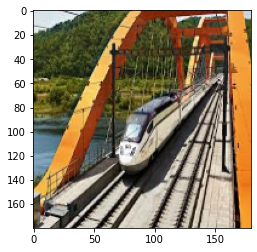

In [20]:
for images_batch, labels_batch in val_data.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


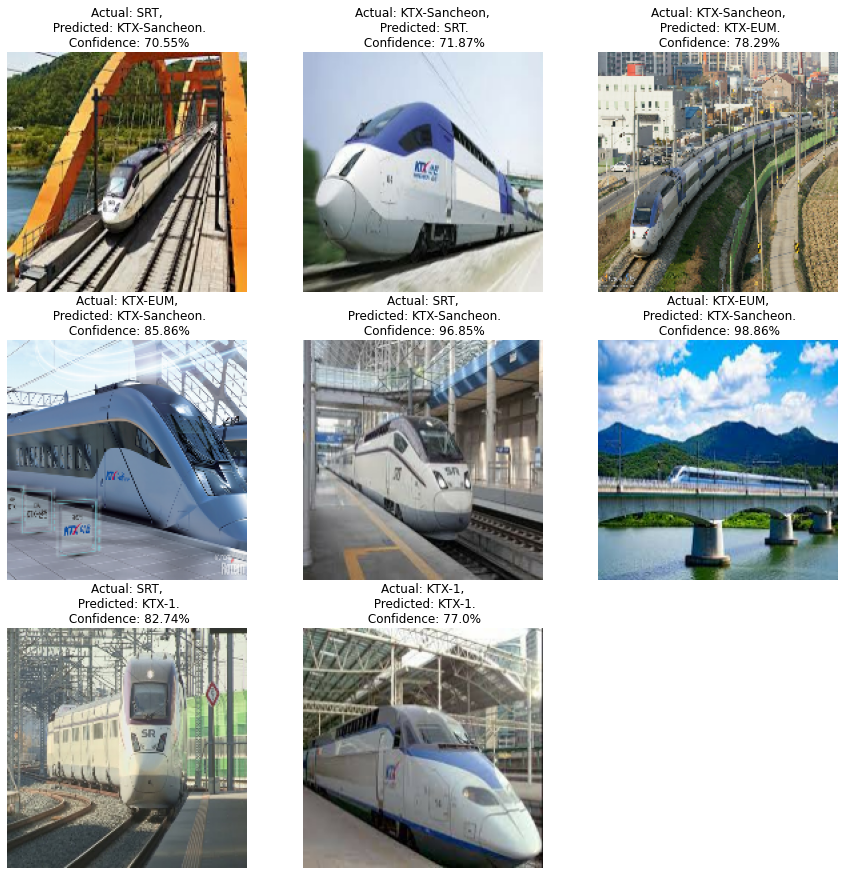

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in val_data.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")